# Cornish-Fisher expansion (fourth order)

We follow here the specification of the Cornish-Fisher expansion described in Aboura and Maillard (2016). A random variable $Y$ follows a two-parameter Cornish-Fisher distribution (a CF distribution, for short) with parameters $\psi _{1}$ and $\psi _{2}$ if

\begin{equation}
Y = a_{0}(\psi _{1},\psi _{2})+a_{1}(\psi _{1},\psi _{2})W+a_{2}(\psi
_{1},\psi _{2})W^{2}+a_{3}(\psi _{1},\psi _{2})W^{3},  \label{Cornish}
\end{equation}
where $W$ is a standard normal random variable, $\psi _{1},$ $\psi _{2}$ are
parameters such that 

\begin{equation*}
\left \vert \psi _{1}\right \vert <6(\sqrt{2}-1)\approx 2.4853
\end{equation*}

and 
\begin{equation*}
\psi _{2}\in \left( \frac{36+11\psi _{1}^{2}-\sqrt{\psi _{1}^{4}-216\psi
_{1}^{2}+1296}}{9},\frac{36+11\psi _{1}^{2}+\sqrt{\psi _{1}^{4}-216\psi
_{1}^{2}+1296}}{9}\right) ,
\end{equation*}

and we denote $a_{0}(\psi _{1},\psi _{2})=-\psi _{1}/6,$ $a_{1}(\psi_{1},\psi _{2})=1-\psi _{2}/8+5\psi _{1}^{2}/36,$ $a_{2}(\psi _{1},\psi_{2})=\psi _{1}/6$ and $a_{3}(\psi _{1},\psi _{2})=\psi _{2}/24-\psi_{1}^{2}/18$. For simplicity, hereafter we write $a_{j}$ instead of $a_{j}(\psi _{1},\psi _{2})$. Note that the conditions on $\psi _{1}$ and $\psi _{2}$ are introduced to guarantee that the transformation from $W$ to $Y $ is one-to-one. 

Denote $$h(W):=a_{0}+a_{1}W+a_{2}W^{2}+a_{3}W^{3}.$$

# CDF

The cdf of $Y$ is $$F_{Y}(y\mid \psi _{1},\psi _{2})=\Phi(h^{-1}(y)).$$

In [104]:
library('GoFKernel')

# Cornish-Fisher cdf
CFcdf <- function(y,par1,par2){
    F <- NULL
    a0 <- -par1/6 
    a1 <- 1-par2/8+(5/36)*par1^2  
    a2 <- par1/6
    a3 <- par2/24-(par1^2)/18 
    h <- function(x){a0+a1*x+a2*x^2+a3*x^3}
    hinv <- inverse(h)
    for (i in 1:length(y)){
        F <- rbind(F,pnorm(hinv(y[i])))     
    } 
    return(F)
}

 ## CDF visualization

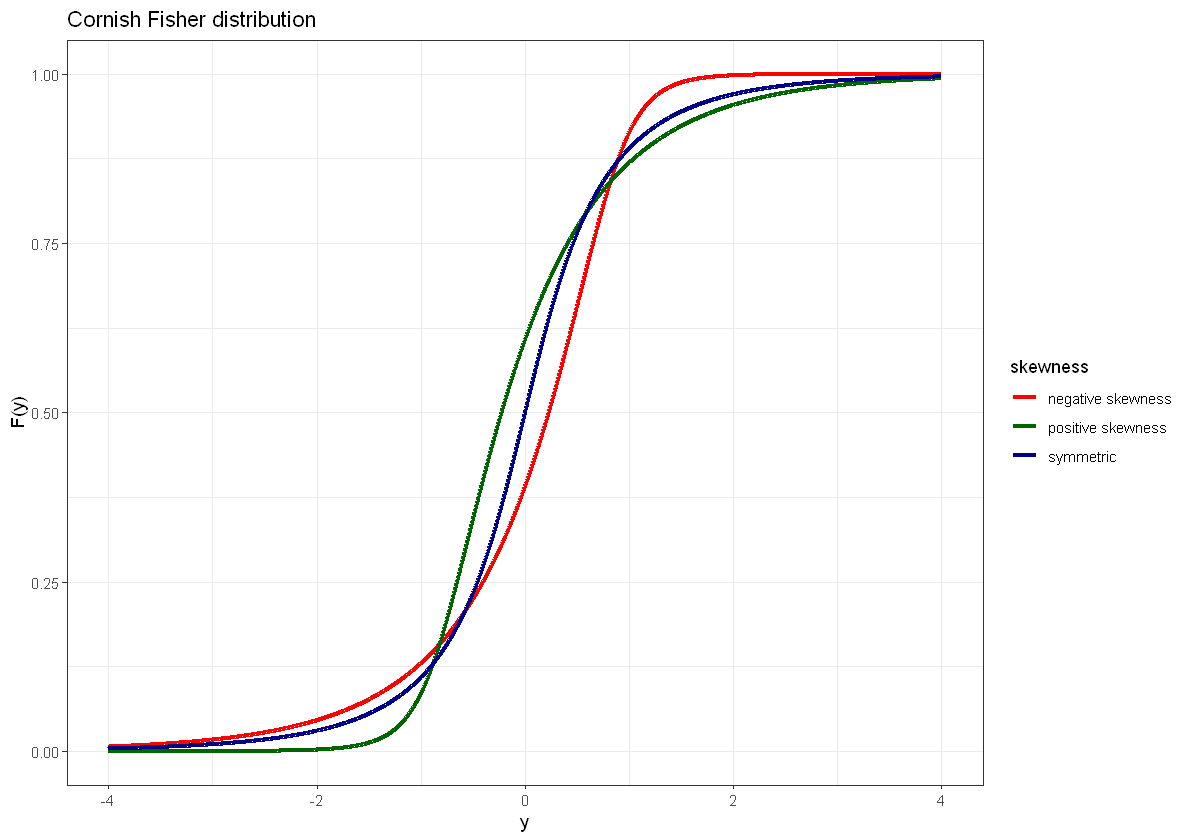

In [108]:
library(pracma) 
library(ggplot2)
 
y <- seq(from = -4, to = 4, by = 0.001)
 
F1 <- CFcdf(y,-1.36,4)
F2 <- CFcdf(y, 1.36,4)
F3 <- CFcdf(y,0,3)
 
df <- data.frame(cbind(y,F1,F2,F3))
colnames(df) <- c("y","F1","F2","F3")

sk <- c("negative skewness" = "red","positive skewness"="darkgreen", "symmetric"="darkblue")
ewfigure <- ggplot(df, aes(x = y)) +
  geom_line(aes(y = F1, color="negative skewness"), linetype = "solid", size = 1.3) +
  geom_line(aes(y = F2, color="positive skewness"), linetype = "solid", size = 1.3) +
  geom_line(aes(y = F3, color="symmetric"), linetype = "solid", size = 1.3) +
  labs(title = "Cornish Fisher distribution",
       #subtitle =  ,
       color = "skewness",
       y = "F(y)",
       x = "y") +
  scale_color_manual(values = sk)
options(repr.plot.width=10, repr.plot.height=7)
ewfigure +  theme_bw(base_line_size = 0.1)

# PDF

The pdf of $Y$ is

\begin{equation*}
f_{Y}(y\mid \psi _{1},\psi _{2})=\frac{\phi (d(y,\psi _{1},\psi _{2}))}{(\frac{\psi _{2}}{8}-\frac{\psi _{1}^{2}}{6})d(y,\psi _{1},\psi _{2})^{2}+\frac{\psi _{1}}{3}d(y,\psi _{1},\psi _{2})+1-\frac{\psi _{2}}{8}+\frac{5\psi _{1}^{2}}{36}}.
\end{equation*}

where $\phi (\cdot )$ denotes the standard normal pdf, 
\begin{equation*}
d(y,\psi _{1},\psi _{2})\equiv -\frac{a_{2}}{3a_{3}}+\sqrt[3]{-\frac{
q(y,\psi _{1},\psi _{2})}{2}+\sqrt{\Delta (y,\psi _{1},\psi _{2})}}+\sqrt[3]{
-\frac{q(y,\psi _{1},\psi _{2})}{2}-\sqrt{\Delta (y,\psi _{1},\psi _{2})}},
\end{equation*}
\begin{equation*}
q(y,\psi _{1},\psi _{2})\equiv \frac{%
2a_{2}^{3}-9a_{1}a_{2}a_{3}+27a_{3}^{2}(a_{0}-y)}{27a_{3}^{3}},\text{ and}
\end{equation*}
\begin{equation*}
\Delta (y,\psi _{1},\psi _{2})\equiv \frac{q(y,\psi _{1},\psi _{2})^{2}}{4}+%
\frac{(3a_{1}a_{3}-a_{2}^{2})^{3}}{729a_{3}^{6}}.
\end{equation*}


m$_{Y}=0$ and 
\begin{equation*}
\text{v}_{Y}=1+\frac{1}{96}\psi _{2}^{2}+\frac{25}{1296}\psi _{1}^{4}-\frac{1%
}{36}\psi _{2}\psi _{1}^{2}.
\end{equation*}

In [26]:
library(pracma) # the function requires this package

CFpdf <- function(y,par1,par2){

    a0 <- -par1/6 
    a1 <- 1-par2/8+(5/36)*par1^2  
    a2 <- par1/6
    a3 <- par2/24-(par1^2)/18 

    A <- (2*a2^3 - 9*a1*a2*a3 + 27*(a3^2)*(a0-y))/(27*a3^3)  
    B <- (A^2)/4 + ((3*a1*a3 - a2^2)^3)/(729*a3^6)  
    C <- -a2/(3*a3) + nthroot(-0.5*A + (B)^(1/2),3)  + nthroot((-0.5*A - (B)^(1/2)),3)  

    num <- dnorm(C) ;
    den <- (par2/8 - (par1^2)/6)*(C^2) + (par1/3)*C + 1 - par2/8 + (5*(par1^2))/36 

    f = num/den 
    return(f)
    }

## Density visualization

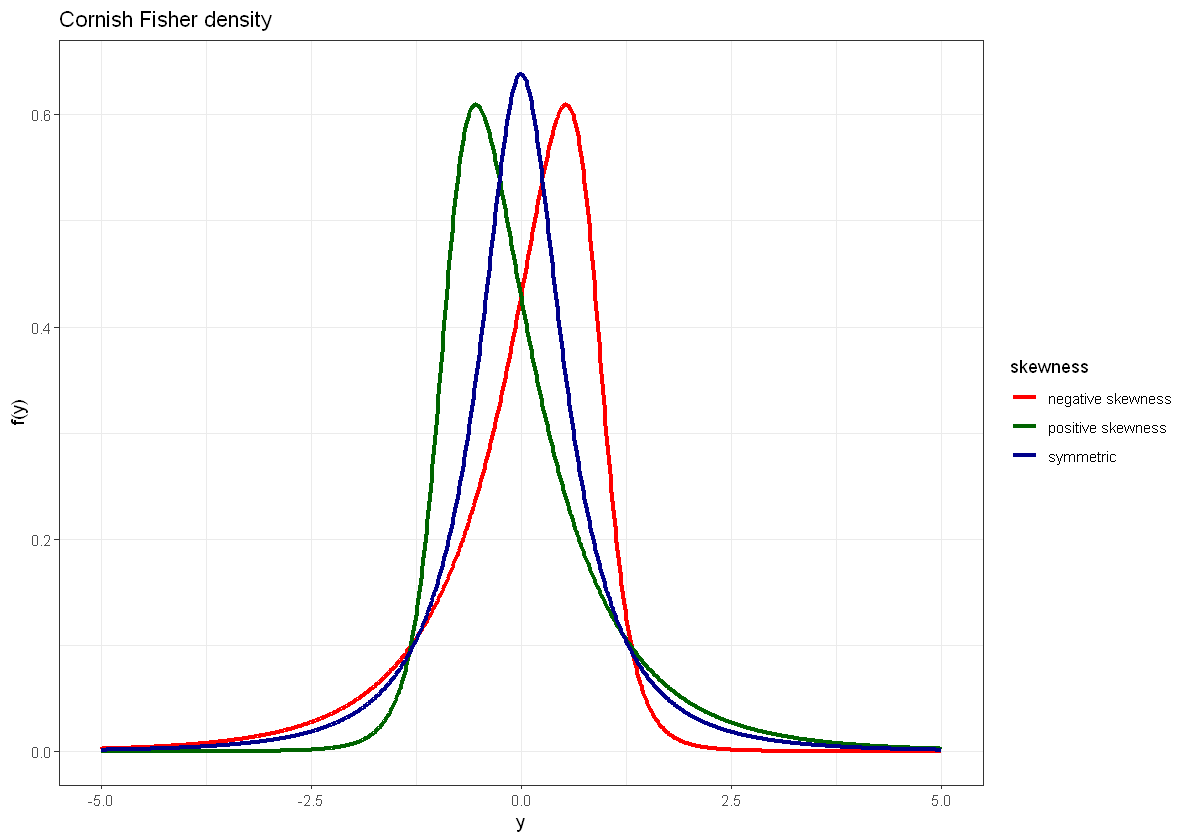

In [67]:
library(pracma) 
library(ggplot2)
 
y <- seq(from = -5, to = 5, by = 0.01)
 
f1 <- CFpdf(y,-1.36,4)
f2 <- CFpdf(y, 1.36,4)
f3 <- CFpdf(y,0,3)
 
df <- data.frame(cbind(y,f1,f2,f3))
colnames(df) <- c("y","f1","f2","f3")

sk <- c("negative skewness" = "red","positive skewness"="darkgreen", "symmetric"="darkblue")
ewfigure <- ggplot(df, aes(x = y)) +
  geom_line(aes(y = f1, color="negative skewness"), linetype = "solid", size = 1.3) +
  geom_line(aes(y = f2, color="positive skewness"), linetype = "solid", size = 1.3) +
  geom_line(aes(y = f3, color="symmetric"), linetype = "solid", size = 1.3) +
  labs(title = "Cornish Fisher density",
       #subtitle =  ,
       color = "skewness",
       x = "y",
       y = "f(y)") +
  scale_color_manual(values = sk)
options(repr.plot.width=10, repr.plot.height=7)
ewfigure +  theme_bw(base_line_size = 0.1)

# Quantile

The $\alpha$-quantile, denoted $q_Y(\alpha \mid \psi _{1},\psi _{2})$, is given by
\begin{equation}
\text{q}_{Y}(\alpha \mid \psi _{1},\psi _{2})=a_{0}+a_{1}\Phi ^{-1}(\alpha
)+a_{2}\Phi ^{-1}(\alpha )^{2}+a_{3}\Phi ^{-1}(\alpha )^{3}
\end{equation}

In [10]:
CFquantile <- function(alpha,par1,par2){
    
    a0 <- -par1/6 
    a1 <- 1-par2/8+(5/36)*par1^2  
    a2 <- par1/6
    a3 <- par2/24-(par1^2)/18
    
    q <- a0 + a1*qnorm(alpha) + a2*qnorm(alpha)^2 + a3*qnorm(alpha)^3
    
    return(q)
}

## Quantile visualization

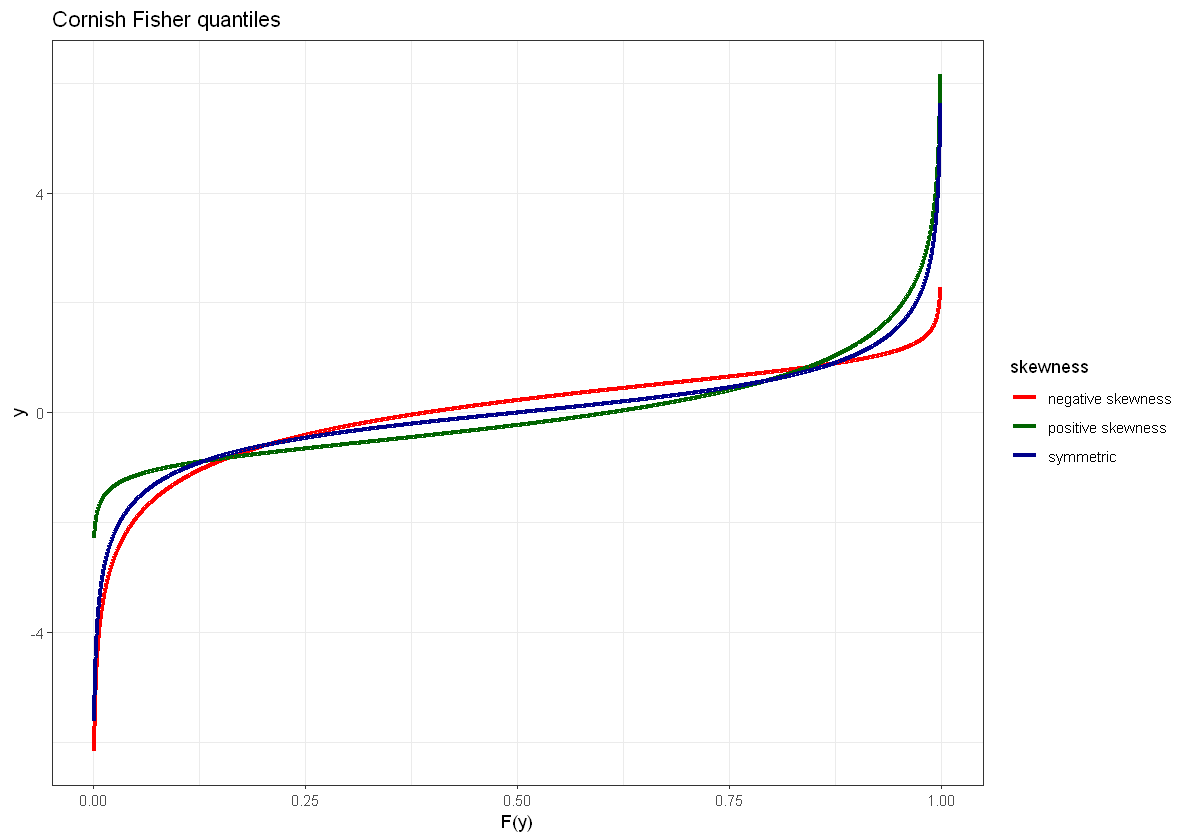

In [122]:
library(pracma) 
library(ggplot2)
 
p <- seq(from = 0.001, to = 0.999, by = 0.0001)
 
q1 <- CFquantile(p,-1.36,4)
q2 <- CFquantile(p, 1.36,4)
q3 <- CFquantile(p,0,3)
 
df <- data.frame(cbind(p,q1,q2,q3))
colnames(df) <- c("p","q1","q2","q3")

sk <- c("negative skewness" = "red","positive skewness"="darkgreen", "symmetric"="darkblue")
ewfigure <- ggplot(df, aes(x = p)) +
  geom_line(aes(y = q1, color="negative skewness"), linetype = "solid", size = 1.3) +
  geom_line(aes(y = q2, color="positive skewness"), linetype = "solid", size = 1.3) +
  geom_line(aes(y = q3, color="symmetric"), linetype = "solid", size = 1.3) +
  labs(title = "Cornish Fisher quantiles",
       #subtitle =  ,
       color = "skewness",
       x = "F(y)",
       y = "y") +
  scale_color_manual(values = sk)

options(repr.plot.width=10, repr.plot.height=7)
ewfigure +  theme_bw(base_line_size = 0.1)